In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/clean_spotify.csv", encoding='latin1')

# Review the DataFrame
df.head(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
# Check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89740 non-null  int64  
 6   duration_ms       89740 non-null  int64  
 7   explicit          89740 non-null  bool   
 8   danceability      89740 non-null  float64
 9   energy            89740 non-null  float64
 10  key               89740 non-null  int64  
 11  loudness          89740 non-null  float64
 12  mode              89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  acousticness      89740 non-null  float64
 15  instrumentalness  89740 non-null  float64
 16  liveness          89740 non-null  float6

In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89740.000000,89740.000000,8.974000e+04,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,53479.005739,33.198808,2.291444e+05,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426
std,33410.141924,20.580640,1.129458e+05,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23766.750000,19.000000,1.730400e+05,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000
50%,50680.500000,33.000000,2.132955e+05,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000
75%,80618.500000,49.000000,2.642930e+05,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
df.track_genre.nunique()

113

In [7]:
genre_df = df.groupby('track_genre')['track_id'].nunique().reset_index(name='song_count')
print(genre_df)

     track_genre  song_count
0       acoustic        1000
1       afrobeat         999
2       alt-rock         999
3    alternative         407
4        ambient         999
..           ...         ...
108       techno         416
109       trance         708
110     trip-hop         904
111      turkish         870
112  world-music         923

[113 rows x 2 columns]


In [8]:
genre_df = genre_df.sort_values(by='song_count', ascending=True)
print(genre_df)

   track_genre  song_count
89   reggaeton          74
56       indie         134
53       house         210
85        punk         226
71       metal         232
..         ...         ...
4      ambient         999
2     alt-rock         999
1     afrobeat         999
12    cantopop         999
0     acoustic        1000

[113 rows x 2 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89740 non-null  int64  
 6   duration_ms       89740 non-null  int64  
 7   explicit          89740 non-null  bool   
 8   danceability      89740 non-null  float64
 9   energy            89740 non-null  float64
 10  key               89740 non-null  int64  
 11  loudness          89740 non-null  float64
 12  mode              89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  acousticness      89740 non-null  float64
 15  instrumentalness  89740 non-null  float64
 16  liveness          89740 non-null  float6

In [10]:
# remove non numeric columns 
cols_remove = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']
numeric_df = df.drop(cols_remove, axis=1)
numeric_df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [13]:
# change bool column to float
numeric_df.loc[:, 'explicit'] = df.loc[:, 'explicit'].astype(int)
numeric_df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [15]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89740 non-null  int64  
 1   duration_ms       89740 non-null  int64  
 2   explicit          89740 non-null  float64
 3   danceability      89740 non-null  float64
 4   energy            89740 non-null  float64
 5   key               89740 non-null  int64  
 6   loudness          89740 non-null  float64
 7   mode              89740 non-null  int64  
 8   speechiness       89740 non-null  float64
 9   acousticness      89740 non-null  float64
 10  instrumentalness  89740 non-null  float64
 11  liveness          89740 non-null  float64
 12  valence           89740 non-null  float64
 13  tempo             89740 non-null  float64
 14  time_signature    89740 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 10.3 MB


In [16]:
# Assuming 'df' is your DataFrame
int_columns = numeric_df.select_dtypes(include=['int64']).columns
numeric_df[int_columns] = numeric_df[int_columns].astype('float64')

# Verify the data types after conversion
print(numeric_df.dtypes)

popularity          float64
duration_ms         float64
explicit            float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object


In [17]:
#Check for multicollinearity
corrs = numeric_df.corr()
print(corrs)

                  popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.023157  0.054898      0.064275  0.013725   
duration_ms        -0.023157     1.000000 -0.065373     -0.064139  0.063258   
explicit            0.054898    -0.065373  1.000000      0.119115  0.100696   
danceability        0.064275    -0.064139  0.119115      1.000000  0.143913   
energy              0.013725     0.063258  0.100696      0.143913  1.000000   
key                 0.003441     0.011297  0.006634      0.035116  0.046335   
loudness            0.071674     0.000360  0.109048      0.271838  0.758774   
mode               -0.016238    -0.039378 -0.033853     -0.062639 -0.075018   
speechiness        -0.047086    -0.060751  0.328201      0.109519  0.141332   
acousticness       -0.038828    -0.108478 -0.091508     -0.177040 -0.732569   
instrumentalness   -0.127477     0.117372 -0.112077     -0.194750 -0.181038   
liveness           -0.013857     0.008109  0.041329 

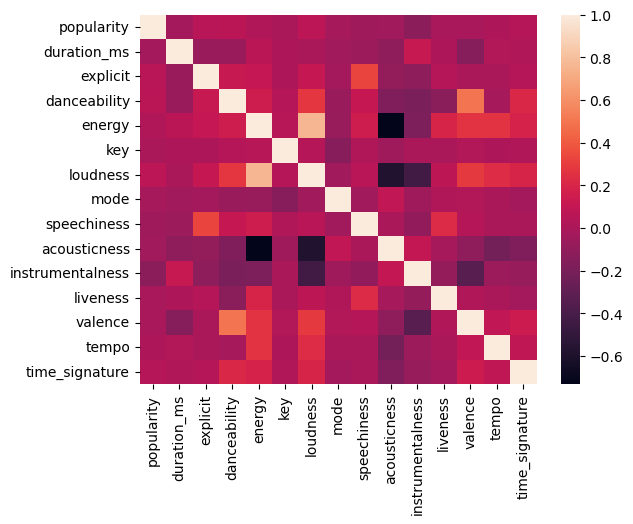

In [18]:
sns.heatmap(corrs)
plt.show()

In [23]:
# initialize
scaler = StandardScaler()

# fit
scaler.fit(numeric_df)

# predict/transform
scaled_data = scaler.transform(numeric_df)
df_scaled = pd.DataFrame(scaled_data, columns=numeric_df.columns, index= df.track_id)

# Display the first few rows of the scaled DataFrame
df_scaled.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_id,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,1.933925,0.013472,-0.306447,0.644253,-0.675975,-1.203275,0.335727,-1.324621,0.490458,-0.875166,-0.535482,0.723656,0.934047,-1.133599,0.226216
4qPNDBW1i3p13qLCt0Ki3A,1.059312,-0.704186,-0.306447,-0.804604,-1.825602,-1.203275,-1.673087,0.754933,-0.098364,1.760810,-0.535468,-0.595078,-0.770269,-1.479843,0.226216
1iJBSr7s7jYXzM8EGcbK5b,1.156491,-0.162188,-0.306447,-0.702731,-1.073473,-1.484183,-0.236524,0.754933,-0.280219,-0.349626,-0.535485,-0.512978,-1.329497,-1.518259,0.226216
6lfxq3CG4xtTiEg7opyCyx,1.836746,-0.240925,-0.306447,-1.676182,-2.240247,-1.484183,-1.918228,0.754933,-0.451480,1.704650,-0.535266,-0.436009,-1.241999,1.981635,-1.979174
5vjLSffimiIP26QG5WcN2K,2.371232,-0.268195,-0.306447,0.315996,-0.746122,-0.922368,-0.226373,0.754933,-0.307585,0.415925,-0.535485,-0.687954,-1.150696,-0.070030,0.226216


In [24]:
string_columns = ['track_id', 'track_name', 'album_name', 'artists' , 'track_genre']
string_df = df.loc[:, string_columns]
string_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_id     89740 non-null  object
 1   track_name   89740 non-null  object
 2   album_name   89740 non-null  object
 3   artists      89740 non-null  object
 4   track_genre  89740 non-null  object
dtypes: object(5)
memory usage: 3.4+ MB


In [26]:
numerical_cols = df.select_dtypes(include=np.number).columns
data_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols, index=df['track_id'])

data_df.head()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_id,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,-1.600691,1.933925,0.013472,0.644253,-0.675975,-1.203275,0.335727,-1.324621,0.490458,-0.875166,-0.535482,0.723656,0.934047,-1.133599,0.226216
4qPNDBW1i3p13qLCt0Ki3A,-1.600661,1.059312,-0.704186,-0.804604,-1.825602,-1.203275,-1.673087,0.754933,-0.098364,1.760810,-0.535468,-0.595078,-0.770269,-1.479843,0.226216
1iJBSr7s7jYXzM8EGcbK5b,-1.600631,1.156491,-0.162188,-0.702731,-1.073473,-1.484183,-0.236524,0.754933,-0.280219,-0.349626,-0.535485,-0.512978,-1.329497,-1.518259,0.226216
6lfxq3CG4xtTiEg7opyCyx,-1.600601,1.836746,-0.240925,-1.676182,-2.240247,-1.484183,-1.918228,0.754933,-0.451480,1.704650,-0.535266,-0.436009,-1.241999,1.981635,-1.979174
5vjLSffimiIP26QG5WcN2K,-1.600571,2.371232,-0.268195,0.315996,-0.746122,-0.922368,-0.226373,0.754933,-0.307585,0.415925,-0.535485,-0.687954,-1.150696,-0.070030,0.226216


In [46]:
cols_remove = ['Unnamed: 0']
df3 = data_df.drop(cols_remove, axis=1)
df3.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_id,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,1.933925,0.013472,0.644253,-0.675975,-1.203275,0.335727,-1.324621,0.490458,-0.875166,-0.535482,0.723656,0.934047,-1.133599,0.226216
4qPNDBW1i3p13qLCt0Ki3A,1.059312,-0.704186,-0.804604,-1.825602,-1.203275,-1.673087,0.754933,-0.098364,1.760810,-0.535468,-0.595078,-0.770269,-1.479843,0.226216
1iJBSr7s7jYXzM8EGcbK5b,1.156491,-0.162188,-0.702731,-1.073473,-1.484183,-0.236524,0.754933,-0.280219,-0.349626,-0.535485,-0.512978,-1.329497,-1.518259,0.226216
6lfxq3CG4xtTiEg7opyCyx,1.836746,-0.240925,-1.676182,-2.240247,-1.484183,-1.918228,0.754933,-0.451480,1.704650,-0.535266,-0.436009,-1.241999,1.981635,-1.979174
5vjLSffimiIP26QG5WcN2K,2.371232,-0.268195,0.315996,-0.746122,-0.922368,-0.226373,0.754933,-0.307585,0.415925,-0.535485,-0.687954,-1.150696,-0.070030,0.226216


In [29]:
# Check if the song "See You Again" is in the dataset
song = df[df['track_name'] == 'See You Again']

# Display the rows where the song is found
song

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
716,716,3XfMyT4Xf5LegDhvbrFEjp,Boyce Avenue;Bea Miller,"Cover Sessions, Vol. 4",See You Again,50,239802,False,0.570,0.413,9,-7.034,1,0.0345,0.5350,0.000000,0.0760,0.2780,152.032,4,acoustic
13486,14329,7qdNE9DyIKk3invtcxdGG8,One Voice Children's Choir,Memories,See You Again,43,209881,False,0.640,0.406,10,-9.337,1,0.0476,0.7870,0.000000,0.0725,0.2470,80.029,4,children
19568,20696,62lmjlPu5Vwd3h18FMSz1G,Wiz Khalifa;Charlie Puth,Give You Love - Cozy Hits,See You Again,2,229525,False,0.690,0.480,10,-7.503,1,0.0816,0.3690,0.000000,0.0649,0.2860,80.025,4,dance
19569,20697,0FtOxBrDP67usYNbqOuy7T,Wiz Khalifa;Charlie Puth,On Chill - Rap & RnB,See You Again,0,229525,False,0.690,0.480,10,-7.503,1,0.0816,0.3690,0.000000,0.0649,0.2860,80.025,4,dance
27502,29795,4pXG8Q82L8WvypAm5Wo86y,Seven Lions;Jason Ross;Fiora,See You Again EP,See You Again,46,263200,False,0.248,0.588,8,-6.292,1,0.0459,0.0415,0.000033,0.1230,0.0382,150.419,4,dubstep


In [57]:
def recommend_song_artist(track_name, artist, df_model, numeric_df):
    train = df_model.loc[df_model['artists'] == artist]
    k = min(len(train), 6)
    
    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(train[numeric_df], train[numeric_df])
    
    # Get the track_id of the given track name
    track_id = df_model[df_model['track_name'] == track_name]['track_id'].iloc[0]
    
    # Get the index of the tracks in the model dataframe
    idx = df_model[df_model['track_id'] == track_id].index[0]
    
    # Get the features of the tracks
    track_features = df_model.loc[idx, numeric_df].values.reshape(1, -1)
    
    # Find the k nearest neighbors
    distances = similarity_matrix[idx]
    indices = distances.argsort()[1:k+1]  # Exclude the selected track
    
    # Get the track names of the nearest neighbors
    tracks = train.iloc[indices]
    tracks['distance'] = distances[indices]
    
    return tracks


In [56]:
# Example usage
recommend_song('2055', df_model, numeric_columns)

NameError: name 'df_model' is not defined

In [61]:
df_model = data_df.reset_index()
df_model.head()

,track_id,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,-1.600691,1.933925,0.013472,0.644253,-0.675975,-1.203275,0.335727,-1.324621,0.490458,-0.875166,-0.535482,0.723656,0.934047,-1.133599,0.226216
1,4qPNDBW1i3p13qLCt0Ki3A,-1.600661,1.059312,-0.704186,-0.804604,-1.825602,-1.203275,-1.673087,0.754933,-0.098364,1.760810,-0.535468,-0.595078,-0.770269,-1.479843,0.226216
2,1iJBSr7s7jYXzM8EGcbK5b,-1.600631,1.156491,-0.162188,-0.702731,-1.073473,-1.484183,-0.236524,0.754933,-0.280219,-0.349626,-0.535485,-0.512978,-1.329497,-1.518259,0.226216
3,6lfxq3CG4xtTiEg7opyCyx,-1.600601,1.836746,-0.240925,-1.676182,-2.240247,-1.484183,-1.918228,0.754933,-0.451480,1.704650,-0.535266,-0.436009,-1.241999,1.981635,-1.979174
4,5vjLSffimiIP26QG5WcN2K,-1.600571,2.371232,-0.268195,0.315996,-0.746122,-0.922368,-0.226373,0.754933,-0.307585,0.415925,-0.535485,-0.687954,-1.150696,-0.070030,0.226216


In [77]:
#df_model.drop(columns=['track_name', 'artists', 'album_name_x', 'album_name'], inplace=True)
song_df = df[['track_id', 'track_name', 'artists', 'album_name']]
df_model = pd.merge(df_model, song_df, on='track_id', how='left')
df_model.head()

,track_id,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name_x,artists_x,album_name_x,track_name_y,artists_y,album_name_y
0,5SuOikwiRyPMVoIQDJUgSV,-1.600691,1.933925,0.013472,0.644253,-0.675975,-1.203275,0.335727,-1.324621,0.490458,-0.875166,-0.535482,0.723656,0.934047,-1.133599,0.226216,Comedy,Gen Hoshino,Comedy,Comedy,Gen Hoshino,Comedy
1,4qPNDBW1i3p13qLCt0Ki3A,-1.600661,1.059312,-0.704186,-0.804604,-1.825602,-1.203275,-1.673087,0.754933,-0.098364,1.760810,-0.535468,-0.595078,-0.770269,-1.479843,0.226216,Ghost - Acoustic,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,Ben Woodward,Ghost (Acoustic)
2,1iJBSr7s7jYXzM8EGcbK5b,-1.600631,1.156491,-0.162188,-0.702731,-1.073473,-1.484183,-0.236524,0.754933,-0.280219,-0.349626,-0.535485,-0.512978,-1.329497,-1.518259,0.226216,To Begin Again,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,Ingrid Michaelson;ZAYN,To Begin Again
3,6lfxq3CG4xtTiEg7opyCyx,-1.600601,1.836746,-0.240925,-1.676182,-2.240247,-1.484183,-1.918228,0.754933,-0.451480,1.704650,-0.535266,-0.436009,-1.241999,1.981635,-1.979174,Can't Help Falling In Love,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...
4,5vjLSffimiIP26QG5WcN2K,-1.600571,2.371232,-0.268195,0.315996,-0.746122,-0.922368,-0.226373,0.754933,-0.307585,0.415925,-0.535485,-0.687954,-1.150696,-0.070030,0.226216,Hold On,Chord Overstreet,Hold On,Hold On,Chord Overstreet,Hold On


In [66]:
numeric_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

numeric_df = df.loc[:, numeric_columns]
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89740 non-null  int64  
 1   duration_ms       89740 non-null  int64  
 2   explicit          89740 non-null  bool   
 3   danceability      89740 non-null  float64
 4   energy            89740 non-null  float64
 5   key               89740 non-null  int64  
 6   loudness          89740 non-null  float64
 7   mode              89740 non-null  int64  
 8   speechiness       89740 non-null  float64
 9   acousticness      89740 non-null  float64
 10  instrumentalness  89740 non-null  float64
 11  liveness          89740 non-null  float64
 12  valence           89740 non-null  float64
 13  tempo             89740 non-null  float64
 14  time_signature    89740 non-null  int64  
dtypes: bool(1), float64(9), int64(5)
memory usage: 9.7 MB


In [69]:
from sklearn.neighbors import NearestNeighbors

In [78]:
df_model['explicit'] = df_model['explicit'].astype(float)

KeyError: 'explicit'

In [72]:
# define the number of nearest neighbors to consider
k = 6

# define a function to recommend songs based on a given song name
def recommend_song_artist(track_name, artist, df_model, numeric_columns):
    
    train = df_model.loc[df_model.artists == artist]
    
    k = min(len(train), 6)
    
    # initialize the model with the number of neighbors
    model = NearestNeighbors(n_neighbors=k, metric='cosine')

    # fit the model to the data
    model.fit(train[numeric_columns])
    
    # get the track_id of the given track name
    track_id = df_model[df_model['track_name'] == track_name]['track_id'].iloc[0]
    
    # get the index of the tracks in the model dataframe
    idx = df_model[df_model['track_id'] == track_id].index[0]
    
    # get the features of the tracks
    track_features = df_model.loc[idx, numeric_columns].values.reshape(1, -1)
    
    # find the k nearest neighbors
    distances, indices = model.kneighbors(track_features)
    
    # get the track names of the nearest neighbors
    tracks = train.iloc[indices[0]]
    tracks["distance"] = distances[0]
    
    return tracks

In [75]:
recommend_song_artist('The Hills', 'The Weeknd', df_model, numeric_columns)

KeyError: "['explicit'] not in index"